### ASSIGNMENT - 13
### Topic - KNN_zoo_problem
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q Prepare a model for zoo classification using KNN__

In [12]:
#Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [13]:
#Loading of data
df = pd.read_csv("zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
#Checking of null values
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [15]:
#Describing Data
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [16]:
# replacing the glass_types from numbers to it's respective classes
df['type'] = df['type'].replace({1:'Mammal',2:'Bird',3:'Reptile',4:'Fish',5:'Amphibian',6:'Bug',7:'Invertebrate'})
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal


In [17]:
#Splitting of data

X = df.iloc[:,1:17]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Text(0, 0.5, 'Error Rate')

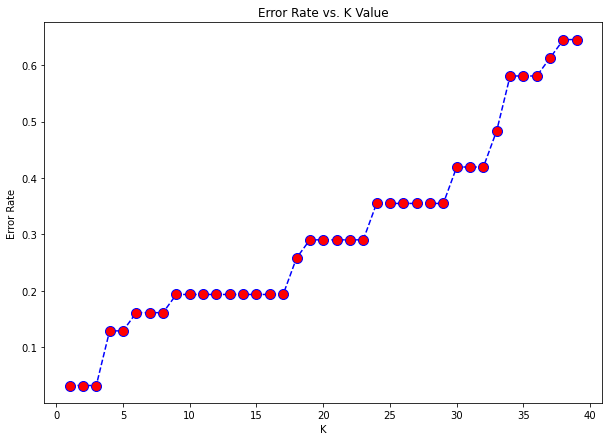

In [18]:
#Error Rates

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test != preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
# From graph it can be seen that k = 1 gives optimum error,hence taking k as 1

k = 1
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


In [20]:
# Evaluation of model

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[ 1  0  0  0  0  0  1]
 [ 0 11  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  1]]
              precision    recall  f1-score   support

   Amphibian       1.00      0.50      0.67         2
        Bird       1.00      1.00      1.00        11
         Bug       1.00      1.00      1.00         3
        Fish       1.00      1.00      1.00         1
Invertebrate       1.00      1.00      1.00         2
      Mammal       1.00      1.00      1.00        11
     Reptile       0.50      1.00      0.67         1

    accuracy                           0.97        31
   macro avg       0.93      0.93      0.90        31
weighted avg       0.98      0.97      0.97        31



In [21]:
# actual vs predicted
df_test = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_test

,Actual,Predicted
58,Bird,Bird
62,Reptile,Reptile
16,Bird,Bird
40,Bug,Bug
59,Bird,Bird
79,Bird,Bird
32,Mammal,Mammal
72,Invertebrate,Invertebrate
21,Bird,Bird
4,Mammal,Mammal


### Implemantation of SMOTE

In [22]:
print(X_train.shape)
print(y_train.shape)

(70, 16)
(70,)


In [23]:
pip install imblearn


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [41]:
print(X_train_res.shape)
print(y_train_res.shape)

(210, 16)
(210,)


Text(0, 0.5, 'Error Rate')

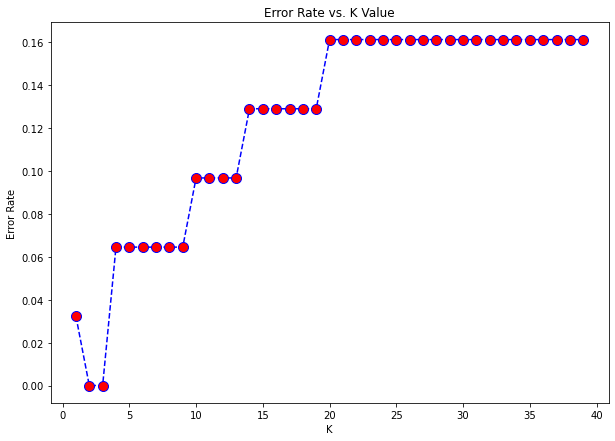

In [42]:
#Error Rates

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train_res, y_train_res)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test != preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train_res, y_train_res)
preds = knn.predict(X_test)


In [44]:
# Evaluation of model

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[ 2  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  1]]
              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         2
        Bird       1.00      1.00      1.00        11
         Bug       1.00      1.00      1.00         3
        Fish       1.00      1.00      1.00         1
Invertebrate       1.00      1.00      1.00         2
      Mammal       1.00      1.00      1.00        11
     Reptile       1.00      1.00      1.00         1

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [45]:
# actual vs predicted
df_test = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_test

,Actual,Predicted
58,Bird,Bird
62,Reptile,Reptile
16,Bird,Bird
40,Bug,Bug
59,Bird,Bird
79,Bird,Bird
32,Mammal,Mammal
72,Invertebrate,Invertebrate
21,Bird,Bird
4,Mammal,Mammal


__Significant Increase in F1 score and accuracy is seen after use of SMOTE__